In [1]:
import pandas as pd
file_path = '/Users/yokij/Desktop/Capstone'

In [2]:
nyc = pd.read_csv(file_path + '/nyc_weekly_data.csv', low_memory = False)
la = pd.read_csv(file_path + '/LA_weekly_data.csv', low_memory = False)

CASERATE: the weekly case rate at MODZCTA level in NYC is published and expressed per 10,000

new_case&caserate: LA only has city level new cases for each week, so I calculated the rate for LA using the weekly case divided by the city total population

In [3]:
nyc = nyc.rename(columns={"CASERATE": "case_rate"})
la = la.rename(columns={"new_case": "case_rate"})

In [4]:
nyc_1st = nyc[(nyc['week'] >= '2018-01-01') & (nyc['week'] <= '2020-06-30')]
la_1st = la[(la['week'] >= '2018-01-01') & (la['week'] <= '2020-06-30')]

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
nyc_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_rate', data=nyc_1st).fit()
nyc_1st['y_hat'] = nyc_model.predict(nyc_1st)
print(nyc_1st['y_hat'].mean())
print(nyc_model.summary())

10.129104589892616
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     1555.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:48:28   Log-Likelihood:                -78258.
No. Observations:               23513   AIC:                         1.565e+05
Df Residuals:                   23508   BIC:                         1.566e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5270      0.279 

/var/folders/75/5mwb35bx4m96qljcn2c182qc0000gn/T/ipykernel_22087/2507175377.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_1st['y_hat'] = nyc_model.predict(nyc_1st)
/Users/yokij/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [6]:
la_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_rate', data=la_1st).fit()
la_1st['y_hat'] = la_model.predict(la_1st)
print(la_1st['y_hat'].mean())
print(la_model.summary())

9.483475371077693
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     961.7
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:48:28   Log-Likelihood:                -68063.
No. Observations:               17401   AIC:                         1.361e+05
Df Residuals:                   17395   BIC:                         1.362e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.6532      0.718  

/var/folders/75/5mwb35bx4m96qljcn2c182qc0000gn/T/ipykernel_22087/4265340395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_1st['y_hat'] = la_model.predict(la_1st)


In [7]:
nyc_1st['city'] = 'nyc'
la_1st['city'] = 'la'

/var/folders/75/5mwb35bx4m96qljcn2c182qc0000gn/T/ipykernel_22087/1200302857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_1st['city'] = 'nyc'
/var/folders/75/5mwb35bx4m96qljcn2c182qc0000gn/T/ipykernel_22087/1200302857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_1st['city'] = 'la'


In [8]:
nycla_1st = pd.concat([nyc_1st, la_1st], axis=0)

In [9]:
average_crime_rates = nycla_1st.groupby(['city', 'week_no'])['crime_rate'].mean().reset_index()

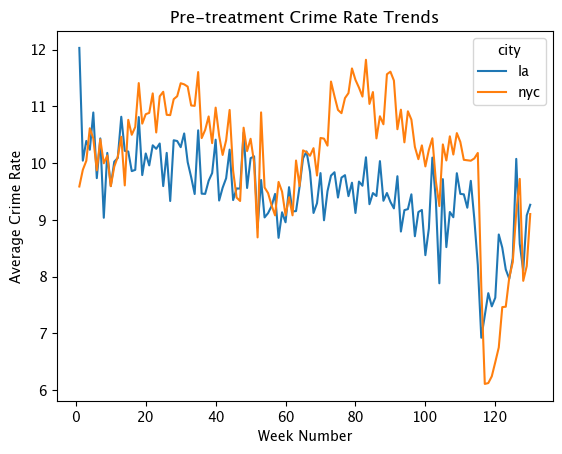

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=average_crime_rates, x='week_no', y='crime_rate', hue='city')
plt.title('Pre-treatment Crime Rate Trends')
plt.xlabel('Week Number')
plt.ylabel('Average Crime Rate')
plt.show()

In [11]:
nycla_model = smf.ols('crime_rate ~ C(city) + week_no:C(city) + p_rate + un_rate + in_median + case_rate', data=nycla_1st).fit()
nycla_1st['y_hat_nycla'] = nycla_model.predict(nycla_1st)
print(nycla_1st['y_hat_nycla'].mean())
print(nycla_model.summary())

9.854514130977327
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:48:28   Log-Likelihood:            -1.5057e+05
No. Observations:               40914   AIC:                         3.012e+05
Df Residuals:                   40906   BIC:                         3.012e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept     

In [12]:
nyc_2nd = nyc[(nyc['week'] >= '2020-07-01') & (nyc['week'] <= '2022-04-01')]
la_2nd = la[(la['week'] >= '2020-07-01') & (la['week'] <= '2022-04-01')]

In [13]:
nyc_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_rate', data=nyc_2nd).fit()
nyc_2nd['y_hat'] = nyc_model.predict(nyc_2nd)
print(nyc_2nd['y_hat'].mean())
print(nyc_model.summary())

10.106676785184474
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     774.4
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:48:28   Log-Likelihood:                -54632.
No. Observations:               16471   AIC:                         1.093e+05
Df Residuals:                   16465   BIC:                         1.093e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1604      0.476 

/var/folders/75/5mwb35bx4m96qljcn2c182qc0000gn/T/ipykernel_22087/4238911902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_2nd['y_hat'] = nyc_model.predict(nyc_2nd)


In [14]:
la_model = smf.ols('crime_rate ~ week_no + p_rate + un_rate + in_median + case_rate', data=la_2nd).fit()
la_2nd['y_hat'] = la_model.predict(la_2nd)
print(la_2nd['y_hat'].mean())
print(la_model.summary())

8.884054752282976
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     619.0
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:48:29   Log-Likelihood:                -47274.
No. Observations:               12276   AIC:                         9.456e+04
Df Residuals:                   12270   BIC:                         9.460e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.1144      1.048  

/var/folders/75/5mwb35bx4m96qljcn2c182qc0000gn/T/ipykernel_22087/4160640715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_2nd['y_hat'] = la_model.predict(la_2nd)


In [15]:
nyc_2nd['city'] = 'nyc'
la_2nd['city'] = 'la'

/var/folders/75/5mwb35bx4m96qljcn2c182qc0000gn/T/ipykernel_22087/193140591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_2nd['city'] = 'nyc'
/var/folders/75/5mwb35bx4m96qljcn2c182qc0000gn/T/ipykernel_22087/193140591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_2nd['city'] = 'la'


In [16]:
nycla_2nd = pd.concat([nyc_2nd, la_2nd], axis=0)

In [17]:
average_crime_rates = nycla_2nd.groupby(['city', 'week_no'])['crime_rate'].mean().reset_index()

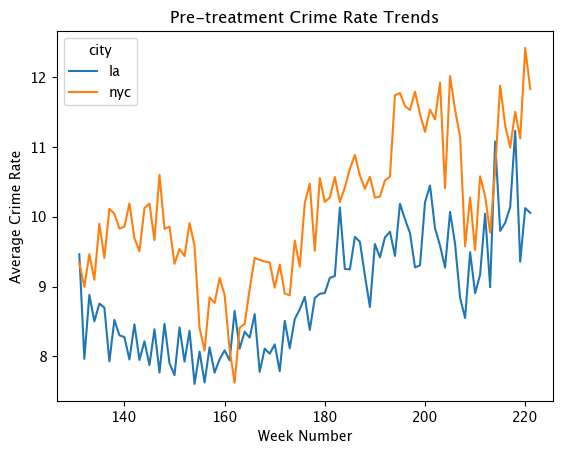

In [18]:
sns.lineplot(data=average_crime_rates, x='week_no', y='crime_rate', hue='city')
plt.title('Pre-treatment Crime Rate Trends')
plt.xlabel('Week Number')
plt.ylabel('Average Crime Rate')
plt.show()

In [19]:
nycla_model = smf.ols('crime_rate ~ C(city) + week_no:C(city) + p_rate + un_rate + in_median + case_rate', data=nycla_2nd).fit()
nycla_2nd['y_hat_nycla'] = nycla_model.predict(nycla_2nd)
print(nycla_2nd['y_hat_nycla'].mean())
print(nycla_model.summary())

9.584573328316118
                            OLS Regression Results                            
Dep. Variable:             crime_rate   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     867.1
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:48:29   Log-Likelihood:            -1.0439e+05
No. Observations:               28747   AIC:                         2.088e+05
Df Residuals:                   28739   BIC:                         2.089e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept     